<a href="https://colab.research.google.com/github/sukhadadh/Machine-Learning-Projects/blob/main/Insurance_dataset_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.load libraries**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from scipy import stats
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 
print("libraries imported..")

libraries imported..


# **2.load dataset**

In [3]:
df = pd.read_csv("insurance.csv")
print("dataset loaded...")

dataset loaded...


# **EDA**

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# **4.Data visualisation**

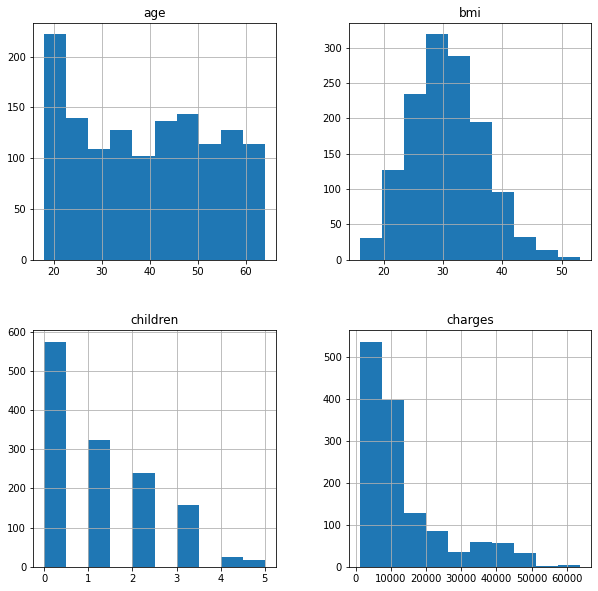

In [13]:
df.hist(figsize =(10,10))
plt.show()


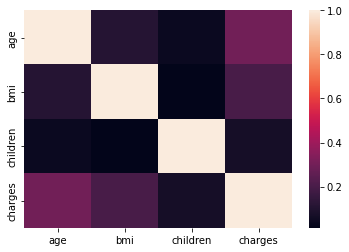

In [14]:
tc = df.corr()
sns.heatmap(tc)
plt.show()


# **5.Data preprocessing**

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
def convert_r(x):
  if x == 'southeast':
    x = 1
  elif x == "southwest":
    x = 2
  elif x == "northwest":
    x = 3
  elif x == "northeast":
    x = 4
  return x

In [17]:
df["region"] = df["region"].apply( lambda x: convert_r(x))

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,2,16884.92400
1,18,male,33.770,1,no,1,1725.55230
2,28,male,33.000,3,no,1,4449.46200
3,33,male,22.705,0,no,3,21984.47061
4,32,male,28.880,0,no,3,3866.85520


In [20]:
def label_transform(x):
  le = LabelEncoder()
  Encoded_le = le.fit_transform(x)
  return Encoded_le


In [21]:
catagoral_label=["sex","smoker"]


In [22]:
for x in catagoral_label:
    df[x] = label_transform(df[x])


In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [25]:
x = df[['age','sex','bmi','children','smoker']]
y = df['charges']

# **6.Data training and testing**

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (1070, 5)
X_test: (268, 5)
Y_train: (1070,)
Y_test: (268,)


# **7.Apply model**

In [27]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(x_test)
y_pred[0:10]

array([11448.70639448,  9931.22531628, 37772.71780571, 15935.73902631,
        6889.97647192,  3598.63725994,  1127.081654  , 14062.31697528,
        8767.6559745 ,  7233.72702263])

# **8.Accuracy**

In [30]:
print("Accuracy of linear regression on train set:",lr.score(x_train,y_train))
print("Accuracy of linear regression on test set:",lr.score(x_test,y_test))

Accuracy of linear regression on train set: 0.7361388804467515
Accuracy of linear regression on test set: 0.7978644236809904


# **9.r2 score**

In [31]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 79.79


# **10. Coefficent and intercept**

In [33]:
print("slop of regression",lr.coef_)
print("intercept of regression",lr.intercept_)

slop of regression [ 2.54952280e+02 -2.34557931e+01  3.20693337e+02  4.30809389e+02
  2.35890247e+04]
intercept of regression -11901.104558765432


# **11.plot regression plot**

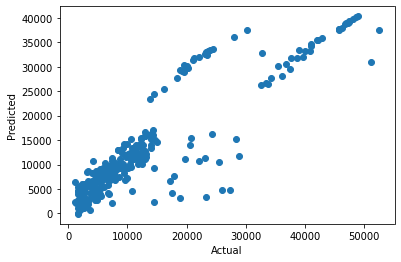

In [34]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

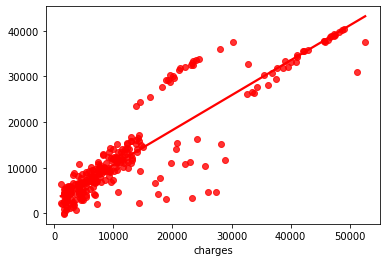

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [37]:
pred_df

,Actual Value,Predicted Value,Difference
578,9724.53000,11448.706394,-1724.176394
610,8547.69130,9931.225316,-1383.534016
569,45702.02235,37772.717806,7929.304544
1034,12950.07120,15935.739026,-2985.667826
198,9644.25250,6889.976472,2754.276028
...,...,...,...
1084,15019.76005,14547.098914,472.661136
726,6664.68595,8068.586771,-1403.900821
1132,20709.02034,15525.247246,5183.773094
725,40932.42950,33151.991537,7780.437963
